In [23]:
#import required libraries
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [24]:
#specify the columns to use
cols_use = ['Date', 'Hour', 'DA_DEMD', 'DryBulb', 'DewPnt', 'DA_LMP', 'Day']

In [25]:
#2012-14 dataset
data1 = pd.read_csv('loadData1.csv', usecols=cols_use, skiprows=range(1415,1439))
data2 = pd.read_csv('loadData2.csv', usecols=cols_use)
data3 = pd.read_csv('loadData3.csv', usecols=cols_use)

In [26]:
tot_data = data1.append([data2], ignore_index=True)

In [27]:
tot_data['Date'] = tot_data['Date'].apply(convert_string_to_datetime2)
tot_data['Date'] = pd.to_datetime(tot_data['Date'])

In [28]:
#function to get day from date
def get_day_from_date(date_time_obj):
    return int(date_time_obj.date().day)

#function to get month from date
def get_month_from_date(date_time_obj):
    return int(date_time_obj.date().month)

In [29]:
tot_data['Day_Date'] = tot_data['Date'].apply(get_day_from_date)

In [36]:
tot_data

Date  Hour  DA_DEMD  DA_LMP  DryBulb  DewPnt  Day  Day_Date  \
0     2012-01-08     1  11369.0   29.58       40      27    1         8   
1     2012-01-08     2  10877.0   27.82       39      26    1         8   
2     2012-01-08     3  10789.0   26.69       38      25    1         8   
3     2012-01-08     4  10887.0   27.71       38      25    1         8   
4     2012-01-08     5  10895.0   27.00       37      26    1         8   
5     2012-01-08     6  10955.0   27.58       37      26    1         8   
6     2012-01-08     7  11528.0   28.62       37      25    1         8   
7     2012-01-08     8  12106.0   28.94       35      24    1         8   
8     2012-01-08     9  13308.0   30.92       35      23    1         8   
9     2012-01-08    10  13668.0   31.09       38      23    1         8   
10    2012-01-08    11  13947.0   30.78       40      23    1         8   
11    2012-01-08    12  14036.0   30.72       39      21    1         8   
12    2012-01-08    13  13843.0   29.79       40      21    1         8   
13    2012-01-08    14  13516.0   28.25       40      21    1         8   
14    2012-01-08    15  13458.0   28.09       40      20    1         8   
15    2012-01-08    16  13687.0   29.21       40      19    1         8   
16    2012-01-08    17  15590.0   34.33       38      19    1         8   
17    2012-01-08    18  16617.0   47.66       36      18    1         8   
18    2012-01-08    19  16129.0   42.16       35      17    1         8   
19    2012-01-08    20  15946.0   36.91       33      15    1         8   
20    2012-01-08    21  15327.0   34.74       32      15    1         8   
21    2012-01-08    22  14370.0   31.14       31      15    1         8   
22    2012-01-08    23  13264.0   30.95       29      15    1         8   
23    2012-01-08    24  12110.0   29.57       27      15    1         8   
24    2012-01-09     1  11437.0   30.87       27      14    2         9   
25    2012-01-09     2  11235.0   28.20       26      14    2         9   
26    2012-01-09     3  10942.0   28.16       25      14    2         9   
27    2012-01-09     4  11012.0   25.44       24      14    2         9   
28    2012-01-09     5  11273.0   30.78       23      14    2         9   
29    2012-01-09     6  12367.0   32.43       24      14    2         9   
...          ...   ...      ...     ...      ...     ...  ...       ...   
17321 2013-12-30    18  18139.0  154.25       26       9    2        30   
17322 2013-12-30    19  17973.0  125.06       24       8    2        30   
17323 2013-12-30    20  17642.0   99.11       22       8    2        30   
17324 2013-12-30    21  17137.0  100.30       21       6    2        30   
17325 2013-12-30    22  16254.0   86.99       19       5    2        30   
17326 2013-12-30    23  14994.0   75.09       17       5    2        30   
17327 2013-12-30    24  14002.0   57.15       16       4    2        30   
17328 2013-12-31     1  13085.0   94.13       15       3    3        31   
17329 2013-12-31     2  13054.0   90.18       13       3    3        31   
17330 2013-12-31     3  12979.0   90.04       13       2    3        31   
17331 2013-12-31     4  13029.0   90.08       12       1    3        31   
17332 2013-12-31     5  12932.0   91.01       12       1    3        31   
17333 2013-12-31     6  13226.0  110.62       12       0    3        31   
17334 2013-12-31     7  14956.0  165.43       12       0    3        31   
17335 2013-12-31     8  16055.0  172.46       11       1    3        31   
17336 2013-12-31     9  16394.0  183.69       11       1    3        31   
17337 2013-12-31    10  16669.0  189.12       13       1    3        31   
17338 2013-12-31    11  16806.0  194.94       15       0    3        31   
17339 2013-12-31    12  16653.0  197.45       17       1    3        31   
17340 2013-12-31    13  16446.0  185.09       19       2    3        31   
17341 2013-12-31    14  16141.0  179.25       21       5    3        31   
17342 2013-12-31    15  15918.0  167.

#### Add Target Labels - Next Hour Data

In [31]:
tot_data_labels = list(tot_data['DA_LMP'][1:])
tot_data_labels.append(data3['DA_LMP'][0])

In [32]:
tot_data['TARGET_DA_LMP'] = tot_data_labels

###Add Previous Week Next Hour Data

In [33]:
#da-lmp prev week
prev_week_da_lmp = list(tot_data['DA_LMP'][1:-168])

#da-demd prev week
prev_week_da_demd = list(tot_data['DA_DEMD'][1:-168])

[33.380000000000003,
 30.260000000000002,
 28.879999999999999,
 20.23,
 20.260000000000002,
 30.719999999999999,
 34.159999999999997,
 37.399999999999999,
 38.619999999999997,
 41.18,
 42.039999999999999,
 40.229999999999997,
 37.689999999999998,
 36.390000000000001,
 38.5,
 49.359999999999999,
 65.560000000000002,
 56.590000000000003,
 46.380000000000003,
 45.0,
 38.43,
 38.0,
 38.119999999999997,
 30.359999999999999,
 30.949999999999999,
 24.050000000000001,
 20.489999999999998,
 20.460000000000001,
 31.030000000000001,
 31.079999999999998,
 35.590000000000003,
 41.590000000000003,
 50.07,
 44.710000000000001,
 48.100000000000001,
 44.409999999999997,
 43.0,
 38.710000000000001,
 39.060000000000002,
 66.560000000000002,
 85.299999999999997,
 81.989999999999995,
 78.0,
 58.359999999999999,
 46.560000000000002,
 46.450000000000003,
 40.219999999999999,
 37.219999999999999,
 36.240000000000002,
 30.98,
 30.850000000000001,
 34.659999999999997,
 48.109999999999999,
 81.469999999999999,
 

In [34]:
len(prev_week_da_lmp)

17351

In [35]:
tot_data = tot_data[168:-1]
tot_data = tot_data.reset_index(drop=True)

tot_data['Prev_Week_DA_DEMD'] = prev_week_da_demd
tot_data['Prev_Week_DA_LMP'] = prev_week_da_lmp

### Add daily means to the data

In [37]:
mean_values = tot_data.groupby('Date', as_index=False).mean()[['Date','DA_DEMD', 'DA_LMP', 'DryBulb', 'DewPnt']]
temp = pd.merge(tot_data, mean_values, how='inner', left_on='Date', right_on='Date', 
                suffixes=('_actual_value','_daily_mean'))
tot_data = temp

### Split data to train and test set

In [38]:
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
#when dividing 23 days train and 7 days test use this and comment out the above lines:
X = tot_data

for i in range(len(X['TARGET_DA_LMP'])):
    if(X['TARGET_DA_LMP'][i] < 1):
        X['TARGET_DA_LMP'][i] = (X['TARGET_DA_LMP'][i-1]+X['TARGET_DA_LMP'][i+1])/2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
#split - 23 days training for each month and remaining test data
train = X[X['Day_Date']<24]
test = X[X['Day_Date']>=24]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [44]:
len(test)

4271

### Add Crude Oil Prices

In [45]:
crude_oil = pd.read_csv('CurdeOil.csv', delimiter='\t')
crude_oil = crude_oil[::-1]
crude_oil = crude_oil.reset_index(drop=True)
crude_oil = crude_oil[2:]
crude_oil = crude_oil.reset_index(drop=True)

def get_num_from_vol_str(string):
    match = re.search(r"(\d+)", string)
    if match!=None:
        return float(match.group(1))
    
crude_oil = crude_oil[['Date', 'Price', 'Vol.']]
crude_oil['Date'] = crude_oil['Date'].apply(convert_string_to_datetime)
crude_oil['Date'] = pd.to_datetime(crude_oil['Date'])

crude_oil['Crude_Oil_Price'] = crude_oil['Price']
crude_oil['Crude_Oil_Vol'] = crude_oil['Vol.']

crude_oil = crude_oil.drop('Price', axis=1)
crude_oil = crude_oil.drop('Vol.', axis=1)

temp = pd.merge(train, crude_oil, how='outer', left_on='Date', right_on='Date', suffixes=('_X','_crude_oil'))
temp.reset_index(drop=True)
temp['Crude_Oil_Price'] = temp['Crude_Oil_Price'].fillna(method='bfill')
temp['Crude_Oil_Vol'] = temp['Crude_Oil_Vol'].fillna(method='bfill')
train = temp[0:13080]

train['Crude_Oil_Vol'] = train['Crude_Oil_Vol'].apply(get_num_from_vol_str)

temp2 = pd.merge(test, crude_oil, how='outer', left_on='Date', right_on='Date', suffixes=('_X','_crude_oil'))
temp2.reset_index(drop=True)
temp2['Crude_Oil_Price'] = temp2['Crude_Oil_Price'].fillna(method='bfill')
temp2['Crude_Oil_Vol'] = temp2['Crude_Oil_Vol'].fillna(method='bfill')
test = temp2[0:4271]

test['Crude_Oil_Vol'] = test['Crude_Oil_Vol'].apply(get_num_from_vol_str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Use Specific Cols and Feature Scaling

In [46]:
conditions = [x for x in train.columns if 'Date' 
              not in x and 'TARGET_DA_LMP' not in x and 'DewPnt' not in x 
              and 'DryBulb_actual_value' not in x]
test_conditions = [x for x in train.columns if 'Date' 
              not in x and 'TARGET_DA_LMP' not in x and 'DewPnt' not in x 
              and 'DryBulb' not in x and 'Prev_Week_DA_DEMD' not in x 
                  and 'DA_DEMD_daily_mean' not in x and 'DA_LMP_daily_mean' not in x 
                  ]
conditions2 = [x for x in train.columns if 'Date' not in x and 'LMP' not in x and 'TARGET_DA_DEMD' not in x]

train_x = train[test_conditions]
train_y = pd.DataFrame(train['TARGET_DA_LMP'])
test_x = test[test_conditions]
test_y = pd.DataFrame(test['TARGET_DA_LMP'])

In [52]:
std_scaler = StandardScaler()
train_x_scaled = std_scaler.fit_transform(train_x)
test_x_scaled = std_scaler.fit_transform(test_x)
train_y_scaled = std_scaler.fit_transform(train_y)

In [66]:
train_x

Hour  DA_DEMD_actual_value  DA_LMP_actual_value  Day  Prev_Week_DA_LMP  \
0       1.0               11369.0                29.58  1.0             33.38   
1       2.0               10877.0                27.82  1.0             30.26   
2       3.0               10789.0                26.69  1.0             28.88   
3       4.0               10887.0                27.71  1.0             20.23   
4       5.0               10895.0                27.00  1.0             20.26   
5       6.0               10955.0                27.58  1.0             30.72   
6       7.0               11528.0                28.62  1.0             34.16   
7       8.0               12106.0                28.94  1.0             37.40   
8       9.0               13308.0                30.92  1.0             38.62   
9      10.0               13668.0                31.09  1.0             41.18   
10     11.0               13947.0                30.78  1.0             42.04   
11     12.0               14036.0                30.72  1.0             40.23   
12     13.0               13843.0                29.79  1.0             37.69   
13     14.0               13516.0                28.25  1.0             36.39   
14     15.0               13458.0                28.09  1.0             38.50   
15     16.0               13687.0                29.21  1.0             49.36   
16     17.0               15590.0                34.33  1.0             65.56   
17     18.0               16617.0                47.66  1.0             56.59   
18     19.0               16129.0                42.16  1.0             46.38   
19     20.0               15946.0                36.91  1.0             45.00   
20     21.0               15327.0                34.74  1.0             38.43   
21     22.0               14370.0                31.14  1.0             38.00   
22     23.0               13264.0                30.95  1.0             38.12   
23     24.0               12110.0                29.57  1.0             30.36   
24      1.0               11437.0                30.87  2.0             30.95   
25      2.0               11235.0                28.20  2.0             24.05   
26      3.0               10942.0                28.16  2.0             20.49   
27      4.0               11012.0                25.44  2.0             20.46   
28      5.0               11273.0                30.78  2.0             31.03   
29      6.0               12367.0                32.43  2.0             31.08   
...     ...                   ...                  ...  ...               ...   
13050  19.0               16227.0                47.68  1.0            250.39   
13051  20.0               15463.0                40.04  1.0            252.73   
13052  21.0               14758.0                37.61  1.0            198.82   
13053  22.0               13748.0                33.87  1.0            172.93   
13054  23.0               12539.0                32.09  1.0            163.22   
13055  24.0               11686.0                25.98  1.0            156.32   
13056   1.0               10692.0                18.99  2.0            146.58   
13057   2.0               10645.0                10.37  2.0            141.02   
13058   3.0               10618.0                10.41  2.0            141.68   
13059   4.0               10373.0                14.57  2.0            161.09   
13060   5.0               10615.0                19.02  2.0            195.15   
13061   6.0               11743.0                32.04  2.0            200.63   
13062   7.0               13554.0                44.81  2.0            207.27   
13063   8.0               14861.0                44.11  2.0            203.37   
13064   9.0               15327.0                40.87  2.0            201.25   
13065  10.0               15566.0                43.53  2.0            200.20   
13066  11.0               15575.0                43.47  2.0            191.34   
13067  12.0               15480.0     

### MAPE Function

In [53]:
#function to calculate mape
def mean_absolute_percentage_error(y_pred, y_true): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### PRICE PREDICTIONS

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPRegressor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Random Forest

In [55]:
params = {
    'max_depth': [10], #np.linspace(50,100,5, dtype=int),
    'n_estimators': [1000], #np.linspace(500,2000,5, dtype=int)
    'bootstrap': [True]
}

#rf_reg = GridSearchCV(RandomForestRegressor(), params, n_jobs=-1, cv=7, scoring='neg_mean_squared_error')
rf_reg_price = RandomForestRegressor(max_depth=10, n_estimators=500, bootstrap=True)
rf_reg_price = rf_reg_price.fit(train_x_scaled, train_y_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


### Training Error- MAPE

In [56]:
rf_preds_price = rf_reg_price.predict(train_x_scaled)
rf_preds_price = std_scaler.inverse_transform(rf_preds_price)
mean_absolute_percentage_error(rf_preds_price, train_y['TARGET_DA_LMP'])

5.717484681345611

### Test Error- MAPE

In [59]:
rf_preds_price = rf_reg_price.predict(test_x_scaled)
rf_preds_price = std_scaler.inverse_transform(rf_preds_price)
print("Overall:",mean_absolute_percentage_error(rf_preds_price, test_y['TARGET_DA_LMP']))
print("Jan: ", mean_absolute_percentage_error(rf_preds_price[0:192], test_y['TARGET_DA_LMP'][0:192]))
print("Feb: ", mean_absolute_percentage_error(rf_preds_price[192:192+120], test_y['TARGET_DA_LMP'][192:192+120]))
print("March: ", mean_absolute_percentage_error(rf_preds_price[192+120:192+120+192], 
                                                test_y['TARGET_DA_LMP'][192+120:192+120+192]))
print("April: ", mean_absolute_percentage_error(rf_preds_price[192+120+192:192+120+192+168], 
                                                test_y['TARGET_DA_LMP'][192+120+192:192+120+192+168]))
print("May: ", mean_absolute_percentage_error(rf_preds_price[192+120+192+168:192+120+192+168+192], 
                                                test_y['TARGET_DA_LMP'][192+120+192+168:192+120+192+168+192]))
print("June: ", mean_absolute_percentage_error(rf_preds_price[192+120+192+168+192:192+120+192+168+192+168], 
                                                test_y['TARGET_DA_LMP'][192+120+192+168+192:192+120+192+168+192+168]))
print("June: ", mean_absolute_percentage_error(rf_preds_price[192+120+192+168+192+168:192+120+192+168+192+168+192], 
                                test_y['TARGET_DA_LMP'][192+120+192+168+192+168:192+120+192+168+192+168+192]))

Overall: 7.898366361956978
Jan:  6.291014429695537
Feb:  6.241807862874016
March:  8.526213864495915
April:  8.107785073113558
May:  7.582034192484345
June:  9.11722580063015
June:  6.957919497935618


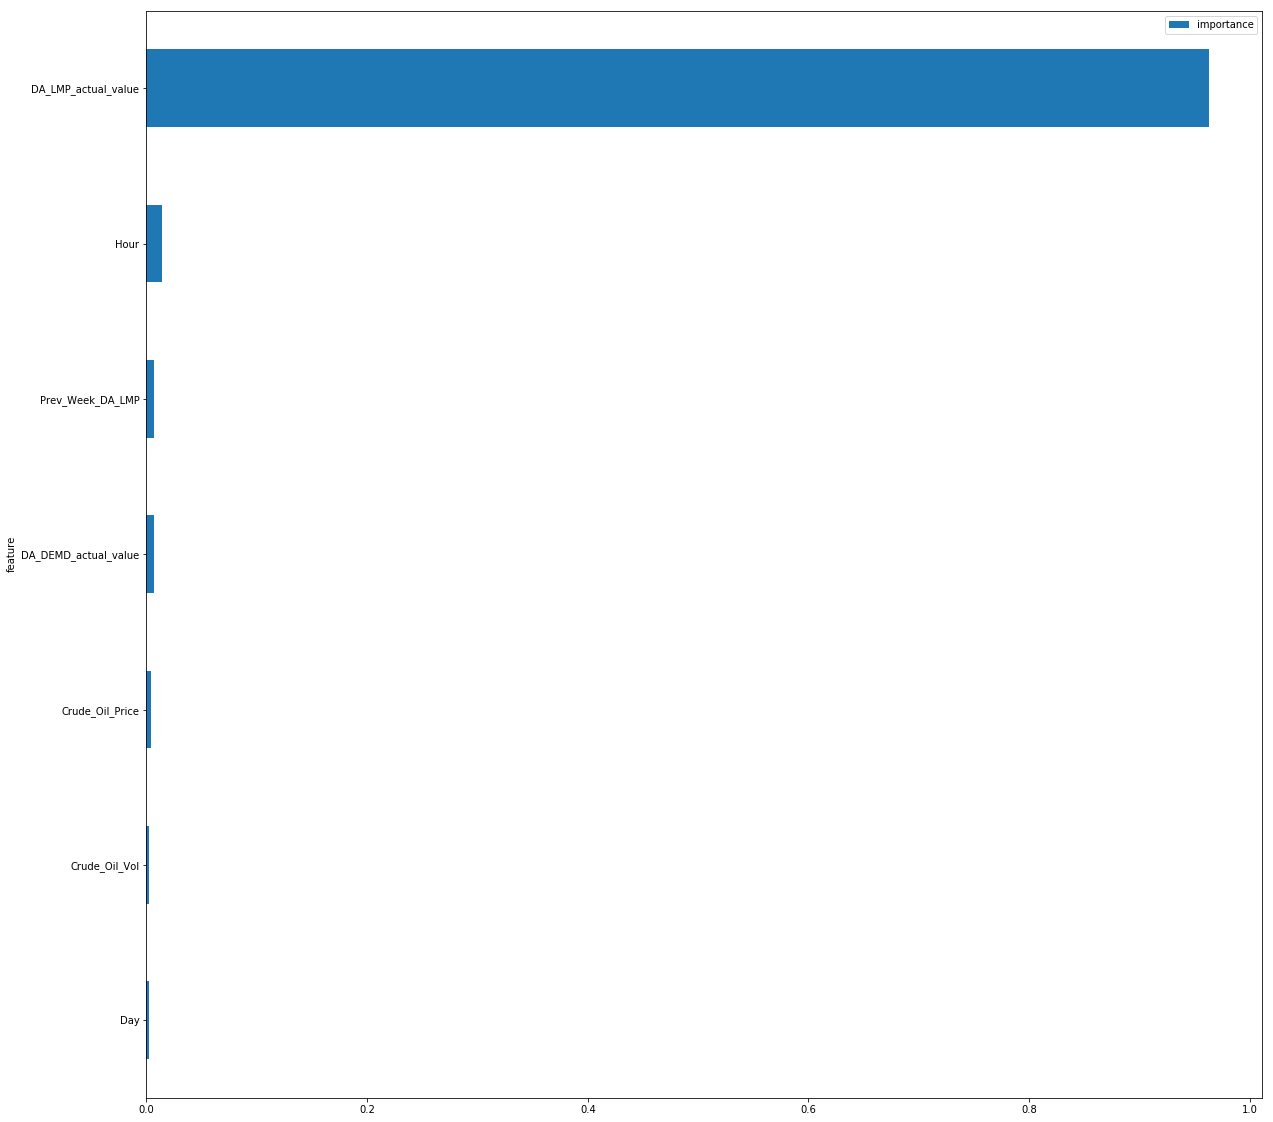

In [60]:
features = pd.DataFrame()
features['feature'] = train_x.columns
features['importance'] = rf_reg_price.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(20, 20))

In [62]:
from sklearn.metrics import mean_absolute_error
days_list = [0,8,5,8,7,8,7,8,8,7,8,7,8,8,5,8,7,8,7,8,8,7,8,7,8]
temp_list =[]
for i in range(0,len(days_list)-1):
    #print(int(np.sum(days_list[:i+1])),int(np.sum(days_list[:i+2])))
    temp_list.append(mean_absolute_error(
        rf_preds_price[int(np.sum(days_list[:i+1]))*24:int(np.sum(days_list[:i+2]))*24], 
                            test_y['TARGET_DA_LMP'][int(np.sum(days_list[:i+1]))*24:int(np.sum(days_list[:i+2]))*24]))

In [63]:
temp_list

[2.1523494850533083,
 1.7582177068300777,
 2.2029713364571233,
 2.1067750093357644,
 2.2443256778742668,
 3.8120060094305499,
 2.8960077220772136,
 2.6578164200140959,
 1.7029393367412577,
 2.1115934021978817,
 6.6527852825849259,
 4.8774610570737016,
 16.066191106990384,
 5.4990384609815637,
 4.3842894413136397,
 2.9762902679224141,
 2.5909742716099404,
 3.13754996058411,
 2.4144642270094541,
 2.9688682642109279,
 1.8107561274087469,
 2.2886988845175393,
 6.422328529103571,
 8.9927312275107631]

### Plot Predicted Vs. Actual

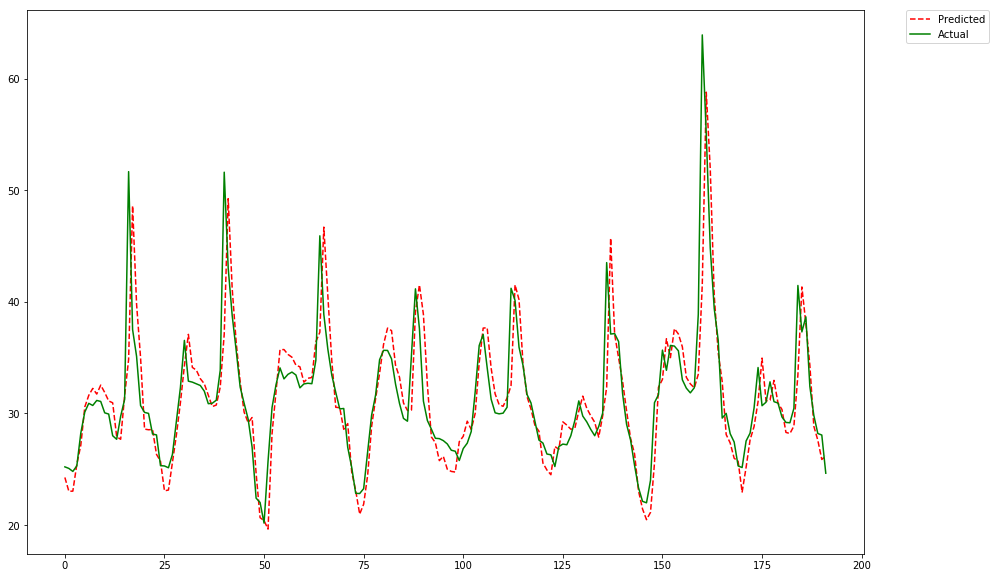

In [65]:
#import matplotlib.pyplot as plt
temp = pd.DataFrame({
    'predicted':rf_preds_price[0:192], 
    'Actual':test_y['TARGET_DA_LMP'][0:192]
})
temp = temp.reset_index(drop=True)
plt.plot(temp['predicted'], 'r--', label="Predicted")
plt.plot(temp['Actual'], 'g-', label="Actual")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(20,10))
plt.show()